In [54]:
#step 1: import libraries
import pandas as pd #data manipulation
import numpy as np #support for arrays and matrices
import matplotlib.pyplot as plt #visualization in python
import seaborn # data visualization statistical graphics
from tensorflow.keras.optimizers import RMSprop

In [55]:
#keras is an open-source software library that provides a python interface for artificial neural networks. 
from keras.datasets import cifar10

In [56]:
#these will be the variables. X_train will contain input, y_train the labels, the tests are used to evaluate the model
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [57]:
X_train.shape

(50000, 32, 32, 3)

In [58]:
X_test.shape

(10000, 32, 32, 3)

In [59]:
y_train.shape

(50000, 1)

In [60]:
y_test.shape

(10000, 1)

In [61]:
#step2: visualize the data

[0]


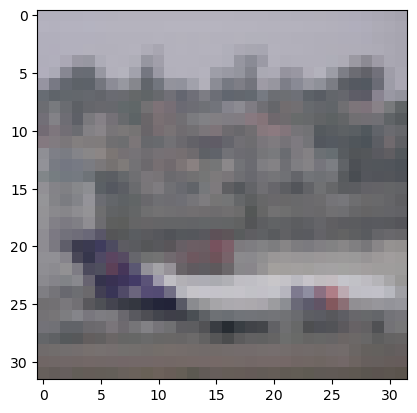

In [62]:
i = 30000
plt.imshow(X_train[i])
print(y_train[i])
#CIFAR-10 is a dataset that consists of several images divided into the following 10 classes:
# 0 Airplanes
# 1 Cars
# 2 Birds
# 3 Cats
# 4 Deer
# 5 Dogs
# 6 Frogs
# 7 Horses
# 8 Ships
# 9 Trucks

In [63]:
#print a matrix of 15 images

/Users/rt/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


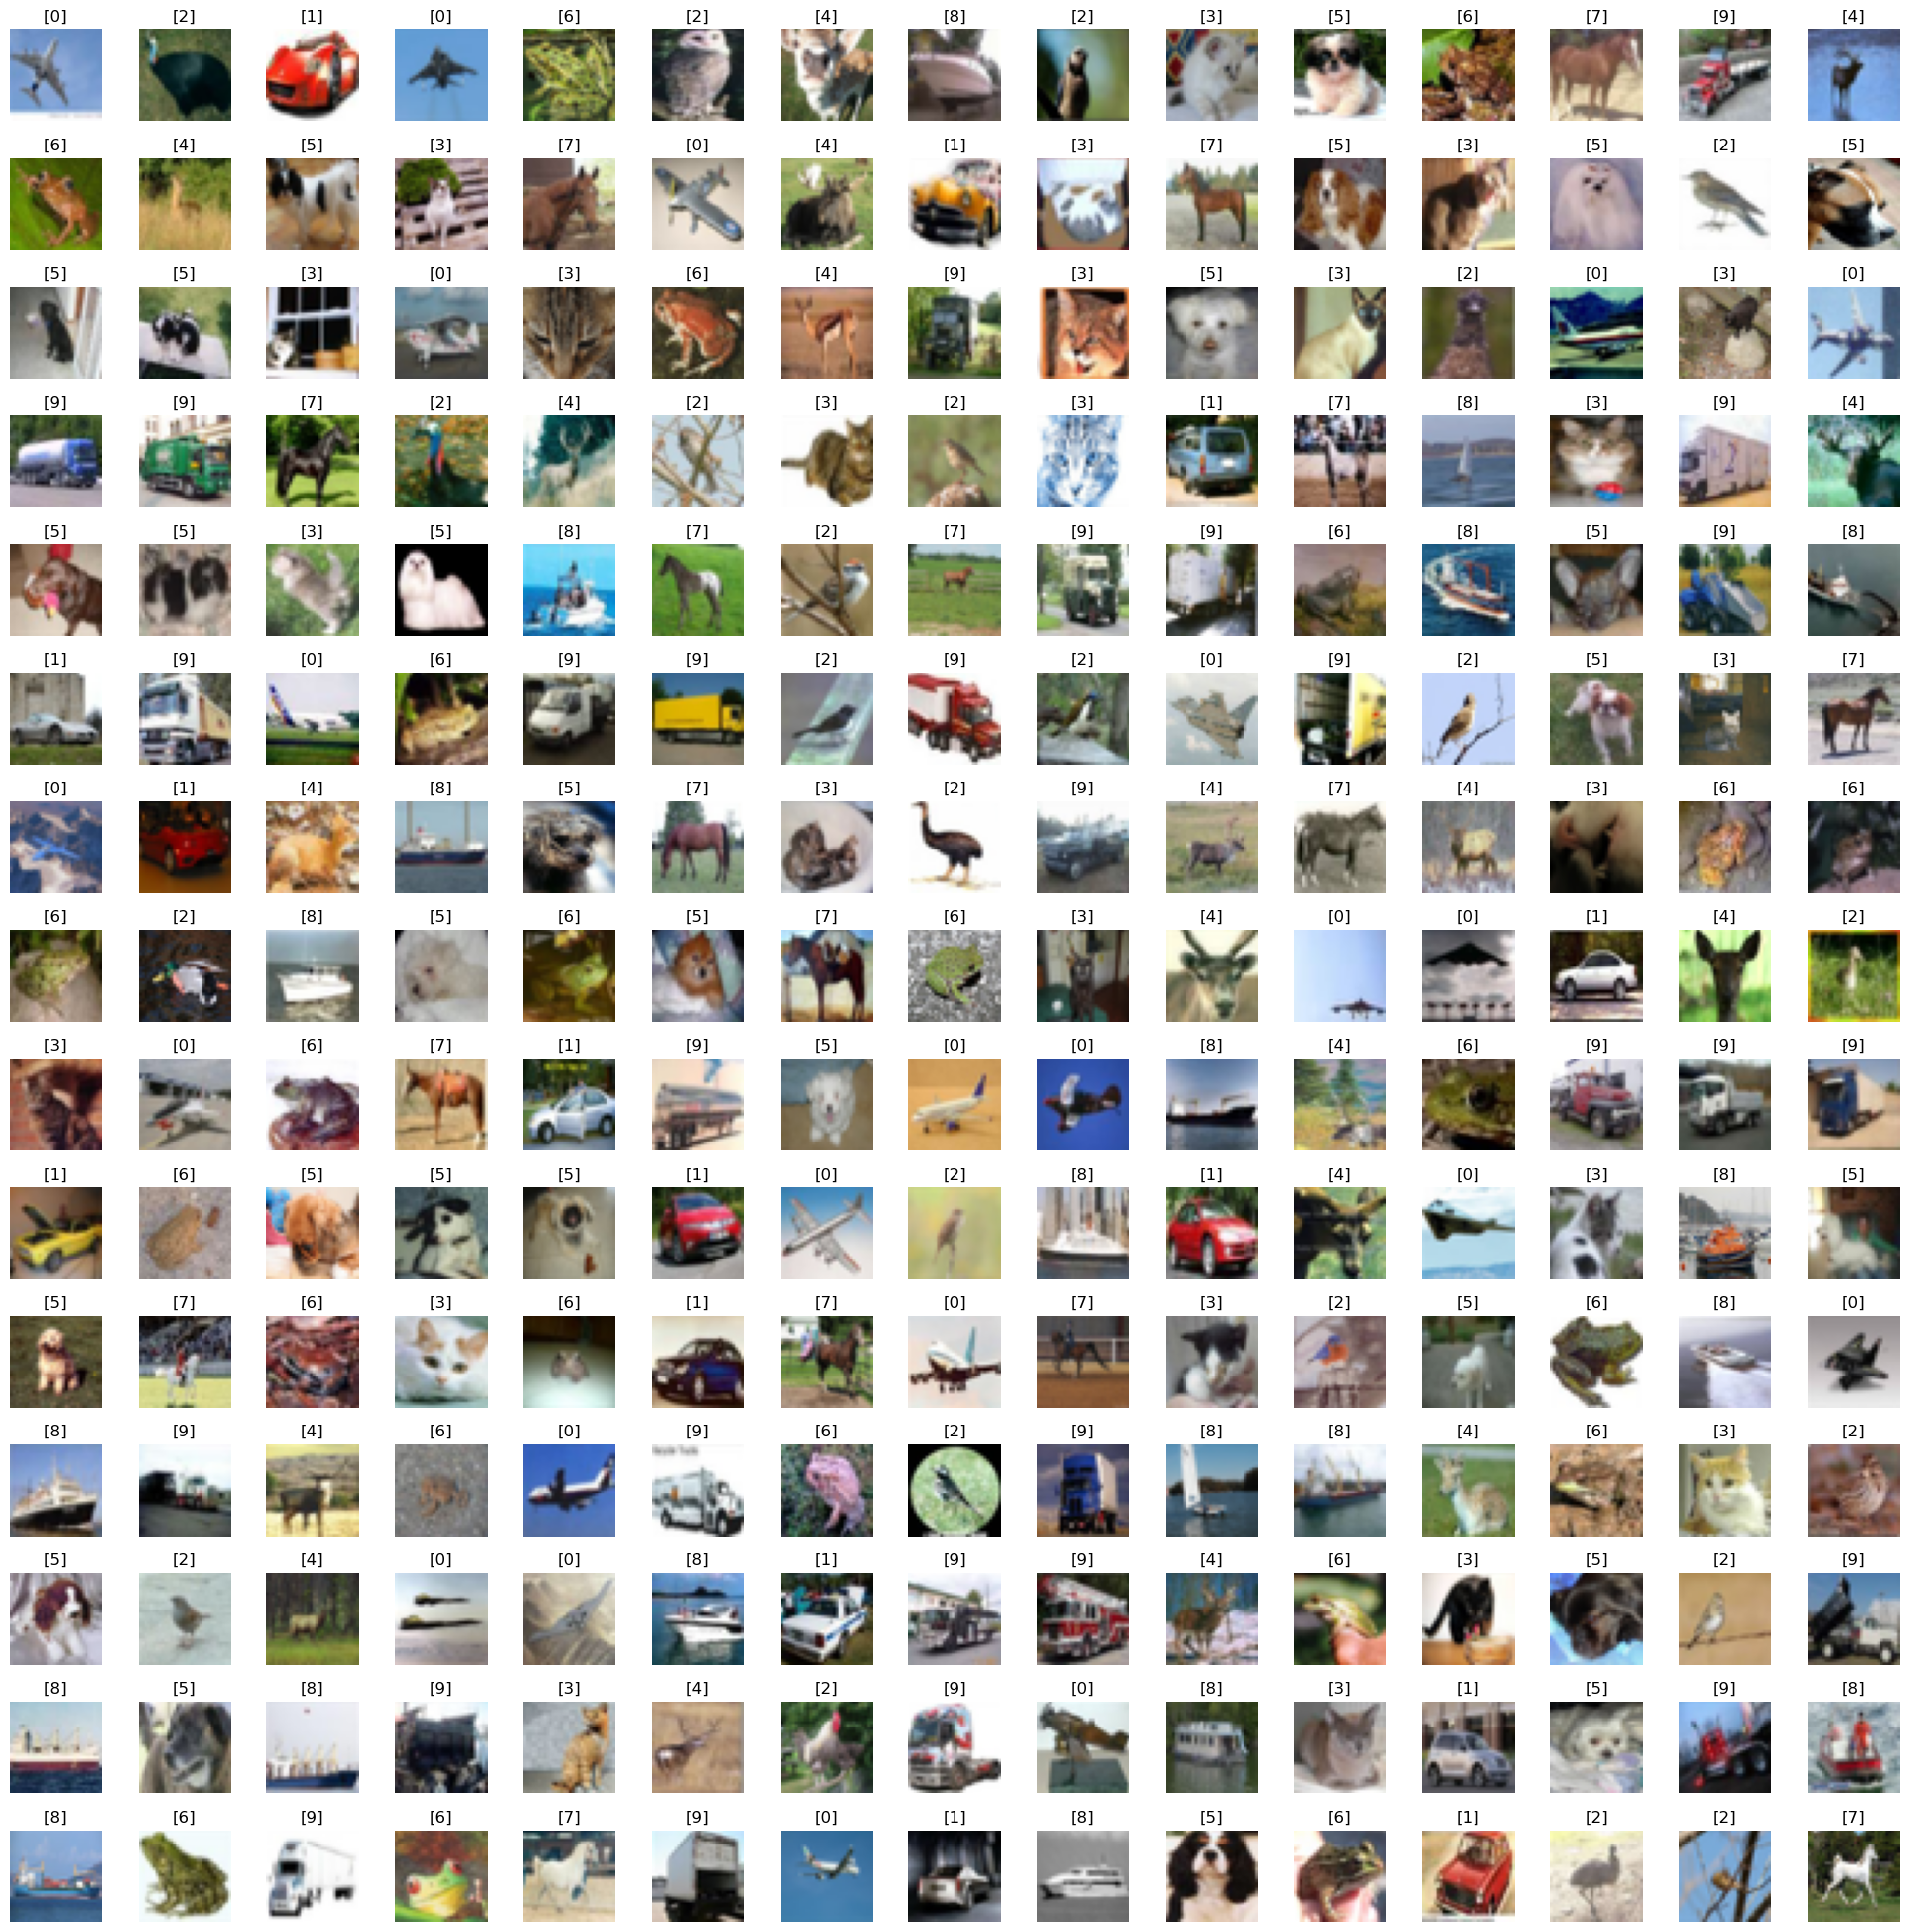

In [64]:
W_grid = 15 #width
L_grid = 15 #lenght

fig, axes = plt.subplots(L_grid, W_grid,figsize = (25,25)) #the size is 25 x 25 
axes = axes.ravel() #flattens the 2D array into a 1D array

n_training=len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0,n_training) #pick a random number
    axes[i].imshow(X_train[index])
    
    n_training
    # now i want to label the pictures
    axes[i].set_title(y_train[index])
    # now i want to remove the numbers on the sides of the pictures
    axes[i].axis('off')
   
    #fix the space between the figures
    plt.subplots_adjust(hspace=0.4)
    
    

In [65]:
# step3: data preparation convert the images to a flot type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [66]:
number_cat = 10

In [67]:
# i know i have 10 categories
y_train


array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [68]:
import keras
y_train = keras.utils.to_categorical(y_train, number_cat)

In [69]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [70]:
y_test = keras.utils.to_categorical(y_test, number_cat)

In [71]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [72]:
X_train = X_train/255
X_test = X_test/255

In [73]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [74]:
X_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [75]:
X_train.shape

(50000, 32, 32, 3)

In [76]:
Input_shape = X_train.shape[1:]

In [77]:
Input_shape

(32, 32, 3)

In [78]:
#step4: train the model
#build model
from keras.models import Sequential
#tensorflow is from google platform to build ml models, but we will API(keras) that sits on top of tensorFlow,
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
#sequential model from left hand side, to the right hand side
#Conv2D to perform convolution, maxpooling2D to downsampling to reduce to the images, dense to create neural networks
#flatten to flaten the array, dropout to perform regulazation
#adam to perfom optimize

In [79]:
#build the network
cnn_model = Sequential()
#build layers
#32 convolutions
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape = Input_shape))
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4)) #drop off 40%

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

#build fully connected network
cnn_model.add(Dense(units = 1024, activation = 'relu'))
#another hidding layer
cnn_model.add(Dense(units = 1024, activation = 'relu'))

#output layer
cnn_model.add(Dense(units = 10, activation = 'softmax'))


In [80]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.RMSprop(learning_rate=0.001), metrics = ['accuracy'])

In [81]:
hisotry = cnn_model.fit(X_train, y_train, batch_size = 32, epochs = 2, shuffle = True)

Epoch 1/2
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5931 - accuracy: 0.4262
Epoch 2/2
1563/1563 [==============================] - 103s 66ms/step - loss: 1.1993 - accuracy: 0.5851


In [82]:
# model evaluation using test data, the train model is the cnn_model
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}'. format(evaluation[1]))


313/313 [==============================] - 6s 18ms/step - loss: 1.1245 - accuracy: 0.6189
Test Accuracy: 0.6189000010490417


In [83]:
import numpy as np

# Assuming cnn_model is your model and X_test is your test dataset
predictions = cnn_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1).astype('int64')

313/313 [==============================] - 6s 19ms/step


In [84]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [85]:
y_test = y_test.argmax(1)

In [86]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

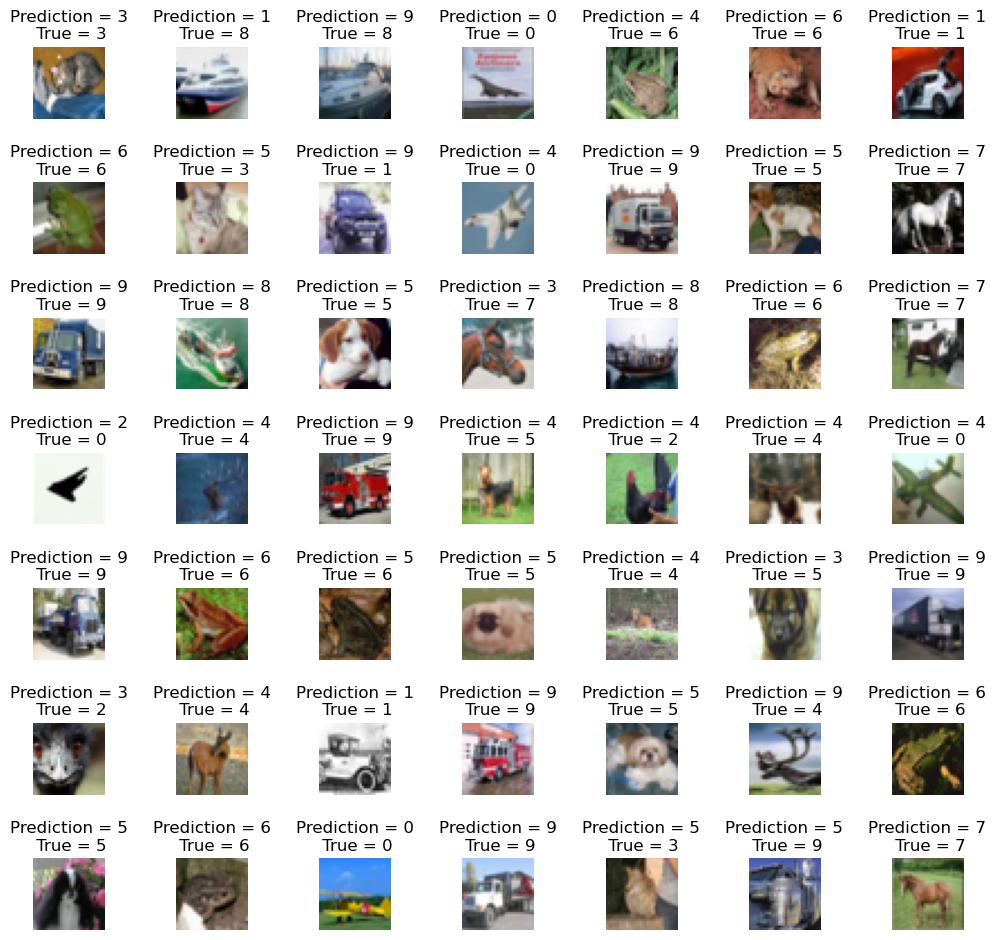

In [87]:

L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()
#this is a loop
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis('off')

    plt.subplots_adjust(wspace=1)
    
    

In [88]:
#summarize

<Axes: >

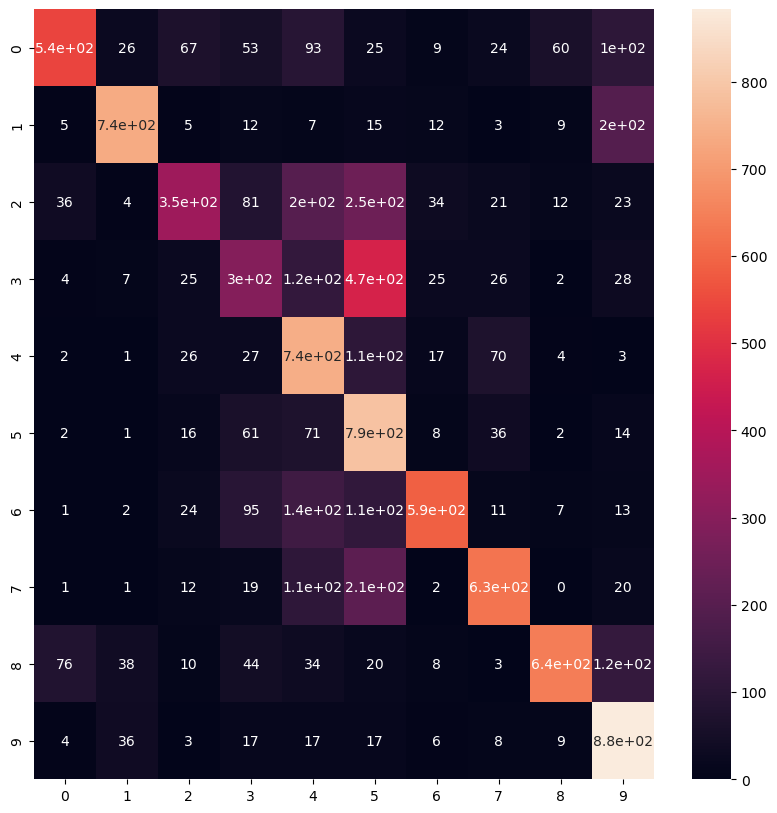

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicted_classes)
cm
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot = True)

In [90]:
import os
directory = os.path.join(os.getcwd(),'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)
model_path=os.path.join(directory, 'keras_cifar10_trained_model.h5')
cnn_model.save(model_path)

In [91]:
#perfom better genelerazation
#random 
import keras
from keras.datasets import cifar10
(X_train, y_train),(X_test, y_test)=cifar10.load_data()

In [92]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [93]:
X_train.shape

(50000, 32, 32, 3)

In [94]:
n=8
X_train_sample=X_train[:n]

In [95]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train=ImageDataGenerator(rotation_range=90)
dataget_train.fit(X_train)

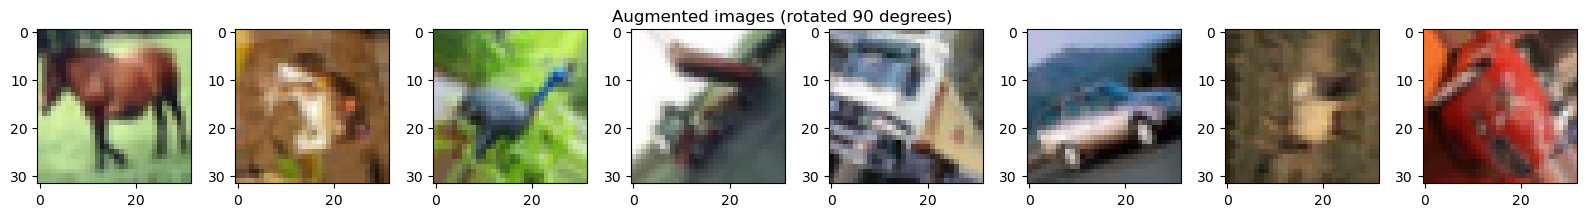

In [98]:
from PIL import Image

fig = plt.figure(figsize = (20,2))

for x_batch in dataget_train.flow(X_train_sample, batch_size = n):

     for i in range(0,n):

            ax = fig.add_subplot(1, n, i+1)

            ax.imshow(Image.fromarray(np.uint8(x_batch[i])))

     fig.suptitle('Augmented images (rotated 90 degrees)')

     plt.show()

     break;